## Übungsaufgabe zum kmeans Clustering
### Aufgabe 1

Gegeben ist das nachfolgende Wine Dataset. Von diesem sind in dieser Übung nur die Feature Daten (x-Dataset) bekannt.
Erzeugen Sie mit Matplotlib Punktwolken aus den Featuere kombination (Feature1 und jeweils allen anderen Featuren)
Versuchen Sie aus diesen die mögliche Clusteranzahl zu bestimmen. 

In [1]:
from sklearn import datasets
#import matplotlib.pyplot as plt


wine = datasets.load_wine()
X = wine.data
# Visualiziere die Datenpunkte für die ersten beiden Merkmale
#for index2, feature2 in enumerate(range(1, X.shape[1])):
#    plt.figure()
#    plt.scatter(X[:,0], X[:, feature2], cmap='viridis')
#    plt.title(f'KMeans Clustering on Features {1} and {feature2+1}')
#    plt.xlabel(f'Feature {1}')
#    plt.ylabel(f'Feature {feature2+1}')
#    plt.show()
    

## Aufgabe 2
Aus den Charts erkennt man nicht wirklich eine sinnvolle Gruppierung von Datenpunkten. Deshalb folgt nun die Analyse mit Hilfe des Elbow_Chart.
Erzeugen Sie mit Hilfe der bereit gestellten Funktion (Elbow_Chart_Funktion) einen Elbow_Chart. Bestimmen Sie hierheraus die sinnvollste Clusteranzahl.

Elbow-Chart wurde als 'elbow_chart.png' gespeichert


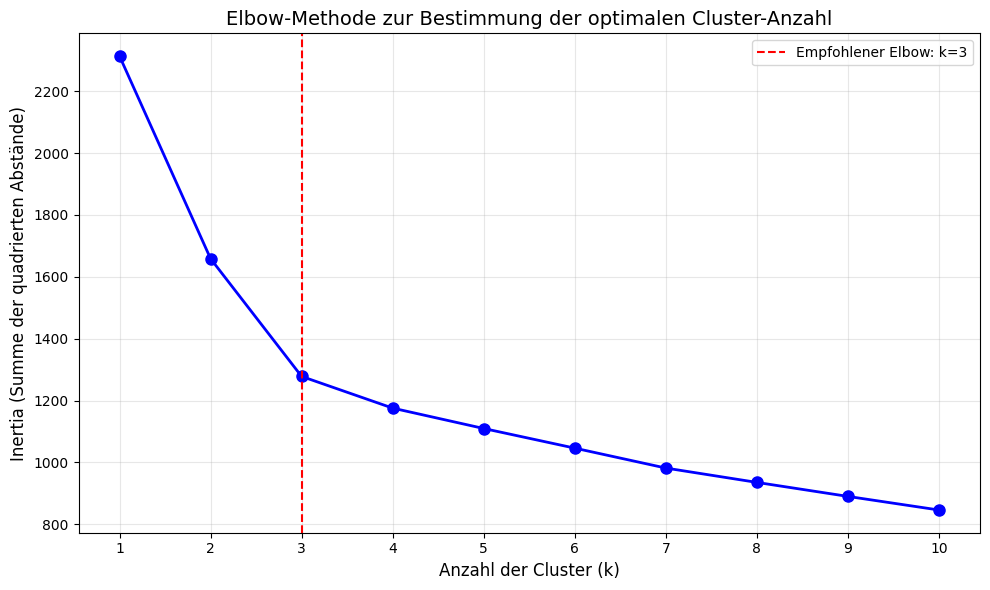

In [2]:
from Elbow_Chart_Funktion import create_elbow_chart as elbow_chart

kmeans_estimator,ineritas =elbow_chart(X=X, max_clusters=10, random_state=42)

## Aufgabe 3

Die Funktion create_Elbow_Chart liefert als Rückgabe Wert die eine Liste der erzeugten Estimator.
Verwenden Sie zum Elbow_Chart den passenden Estimator und bestimmen Sie darüber hinaus noch folgende Punkte:

- labels: Also die Klassen zu dennen der jeweilige Datenpunkt zu geordnet wurde (mit anderen Worten: Die bestimmten y-Klassen)
- Zentrum der jeweiligen Klassen
- Bezogen auf das Wine-Dataset kennen wir ausnahmsweise die richtigen Klassen. Vergleichen Sie deshalb die berechneten Klassen des kmeans Algorithmus mit den realen Klassen aus dem y-Dataset.

Was fällt Ihnen dabei auf?

In [6]:
# Speihere das KMeans Modell mit der optimalen Clusteranzahl ab
kmeans = kmeans_estimator[2]  # Selecting KMeans with optimal clusters (e.g., 3)
# Führe die Clusterzuordnung durch
labels = kmeans.labels_
# Extrahiere die Clusterzentren
centers = kmeans.cluster_centers_
print("Labels:", labels)
print("Cluster Centers:", centers)
# Vorhersage neuer Datenpunkte
y_pred = kmeans.predict(X)
print("Predicted labels for the input data:", y_pred) 

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster Centers: [[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]
Predicted labels for the input data: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 

In [8]:
# Speichere das Modell mit pickle
import pickle
with open('save_model.pkl','wb')as file:
    pickle.dump(kmeans,file)

In [5]:
print(X.shape[1])

13


In [6]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Aufgabe 4

Laden Sie sich das nachfolgende Dataset ins Jupiter Notebook. Bestimmen Sie wieder den Elbow Chart für die besten Parameter. 
Verwenden Sie zum Elbow_Chart den passenden Estimator und bestimmen Sie darüber hinaus noch folgende Punkte:

- labels: Also die Klassen zu dennen der jeweilige Datenpunkt zu geordnet wurde (mit anderen Worten: Die bestimmten y-Klassen)
- Zentrum der jeweiligen Klassen

Alles ist für die Übung vorbereitet
Elbow-Chart wurde als 'elbow_chart.png' gespeichert


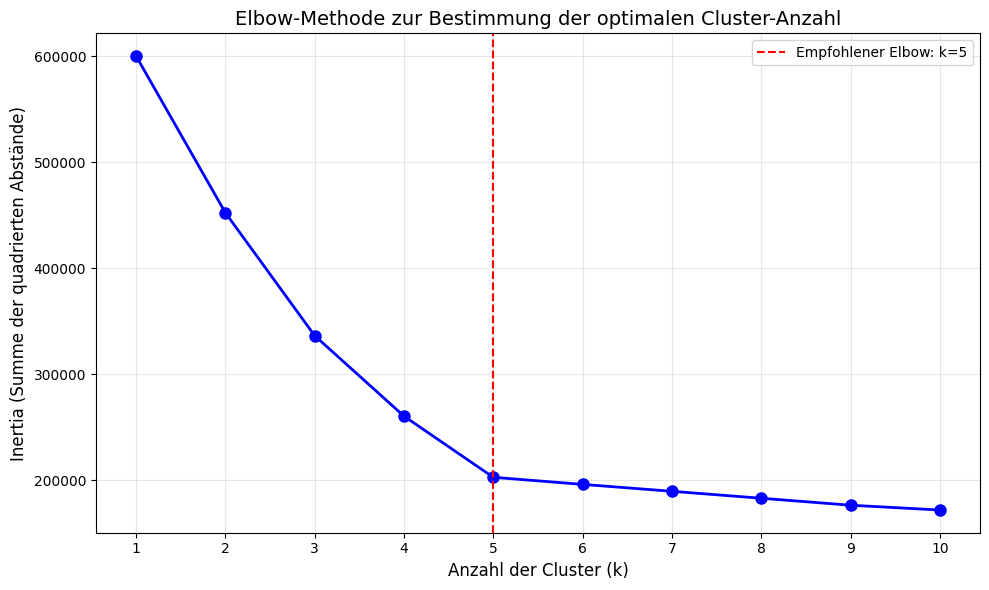

In [7]:
import numpy as np
from Elbow_Chart_Funktion import create_elbow_chart as elbow_chart
try:
    x2=np.loadtxt('x_Dataset_kmeans.csv',delimiter=',')
except:
    print(f"Bitte Speichern Sie die CSV Datein im gleichen Ordner, wie diese Datei")

else:
    print(f"Alles ist für die Übung vorbereitet")

kmeans_estimator, inertia =elbow_chart(X=x2, max_clusters=10, random_state=42)

In [8]:

# Speihere das KMeans Modell mit der optimalen Clusteranzahl ab
kmeans = kmeans_estimator[4]  # Selecting KMeans with optimal clusters (e.g., 4)
# Führe die Clusterzuordnung durch
labels = kmeans.labels_
# Extrahiere die Clusterzentren
centers = kmeans.cluster_centers_
print("Labels:", labels)
print("Cluster Centers:", centers)

 

Labels: [4 4 0 ... 2 1 1]
Cluster Centers: [[ 1.99378447e+00 -4.44375193e-03 -8.12848517e-01  8.14558742e-01
   8.89496206e-03 -6.41419272e-03 -1.22166875e+00  3.95878713e-01
  -9.75891198e-03 -8.12578735e-01 -4.98934610e-01  1.43013532e-01]
 [-4.98863631e-01  1.40505561e-02  1.22002798e+00 -1.22206463e+00
   2.32265181e-03  1.46314190e-02  8.14259663e-01 -4.78029785e-01
   1.57838813e-02  1.22070274e+00  1.99267396e+00  6.03928503e-01]
 [-4.98707268e-01  2.32769243e-03 -8.13662249e-01 -1.22152448e+00
  -1.70411120e-02  4.30713026e-03 -1.22100187e+00 -6.31566797e-01
   5.73299944e-04 -8.14610413e-01 -4.97750308e-01 -1.89986383e-01]
 [-4.98793909e-01 -4.17240176e-03  1.22049835e+00  8.13864408e-01
  -2.23319473e-03  2.80771950e-03  8.13884220e-01  1.75644985e+00
  -1.38031800e-02 -8.13636241e-01 -4.97666785e-01 -1.75526832e+00]
 [-4.97419658e-01 -7.76209480e-03 -8.14015567e-01  8.15165963e-01
   8.05669288e-03 -1.53320760e-02  8.14526737e-01 -1.04273198e+00
   7.20491075e-03  1.22012265